In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

#"Matplotlib inline" allows you to interact with your plots directly in the notebook or shell output, such as zooming, panning, and saving
#%matploltib inline

# 1.Loading and Exploring the data

In [2]:
df=pd.read_csv("loan.csv")
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [4]:
df.shape

(1000, 12)

In [50]:
df.dtypes

Age                        int64
Gender                    object
Income                   float64
Employment_Status         object
Location                  object
Credit_Score               int64
Debt_to_Income_Ratio     float64
Existing_Loan_Balance    float64
Loan_Status               object
Loan_Amount              float64
Interest_Rate            float64
Loan_Duration_Months       int64
dtype: object

In [59]:
df.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,60705.291386,571.094000,0.485502,25239.656186,27636.369345,11.538267,42.221000
std,13.497852,24594.030383,163.395983,0.296466,14202.689890,12925.200961,4.883342,17.116867
min,18.000000,20010.775440,250.000000,0.000628,80.059377,5060.998602,3.003148,12.000000
25%,29.000000,40820.367273,429.000000,0.220606,13597.494593,16756.405848,7.483547,27.000000
50%,42.000000,60547.119929,567.000000,0.483633,25439.429898,27938.066858,11.537942,42.000000
75%,52.000000,80338.552791,720.250000,0.735476,37305.466739,39151.564233,15.499129,57.000000
max,64.000000,150000.000000,849.000000,0.999849,49987.578171,49986.843702,19.991438,71.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


# 2.Working with missing values

In [3]:
df.isnull().sum()

Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64

# Dealing missing values with categorical values.Replace nan with mode

In [4]:
# object datatype using mode
df['Gender'].fillna(df['Gender'].mode().iloc[0], inplace=True)
df['Employment_Status'].fillna(df['Employment_Status'].mode().iloc[0], inplace=True)


# 3.Convert categorical data into numerical format

In [7]:
df["Gender"]=OrdinalEncoder().fit_transform(df[["Gender"]])
df["Employment_Status"]=OrdinalEncoder().fit_transform(df[["Employment_Status"]])
df["Loan_Status"]=OrdinalEncoder().fit_transform(df[["Loan_Status"]])
df['Location']=OrdinalEncoder().fit_transform(df[["Location"]])

In [8]:
df['Gender']=df['Gender'].astype('int')
df['Income']=df['Income'].astype('int')
df["Employment_Status"]=df["Employment_Status"].astype('int')
df["Existing_Loan_Balance"]=df["Existing_Loan_Balance"].astype('int')
df["Interest_Rate"]=df["Interest_Rate"].astype('int')
df["Loan_Amount"]=df["Loan_Amount"].astype(int)
df["Loan_Status"]=df["Loan_Status"].astype(int)
df["Location"]=df["Location"].astype(int)
df

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266,0,1,639,0.007142,27060,1,13068,18,59
1,46,0,37283,0,1,474,0.456731,40192,0,15159,11,69
2,32,1,69567,0,2,750,0.329231,25444,0,6131,17,69
3,60,0,72016,0,0,435,0.052482,3122,1,37531,16,26
4,25,0,32161,1,1,315,0.450236,19197,1,41466,18,66
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,0,98081,1,2,727,0.961613,3586,1,41473,3,23
996,40,1,30044,0,0,416,0.775082,32993,0,48942,12,62
997,27,0,21355,1,0,806,0.621937,21579,0,34010,3,55
998,61,0,81612,0,0,845,0.606793,38180,0,17504,13,27


# 4.Data Visualization

<Axes: xlabel='Loan_Status', ylabel='count'>

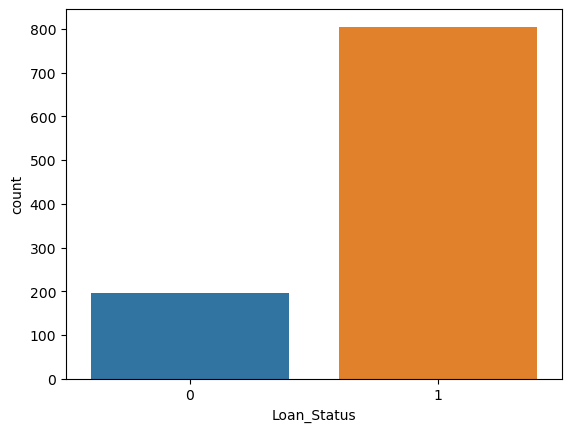

In [7]:
sns.countplot(x="Loan_Status",data=df)

<Axes: xlabel='Gender', ylabel='count'>

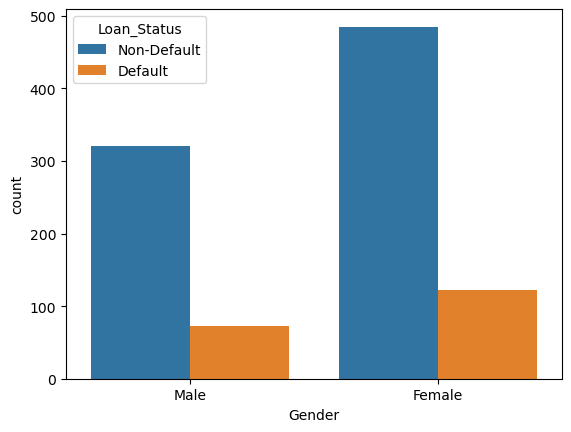

In [12]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

<Axes: xlabel='Employment_Status', ylabel='count'>

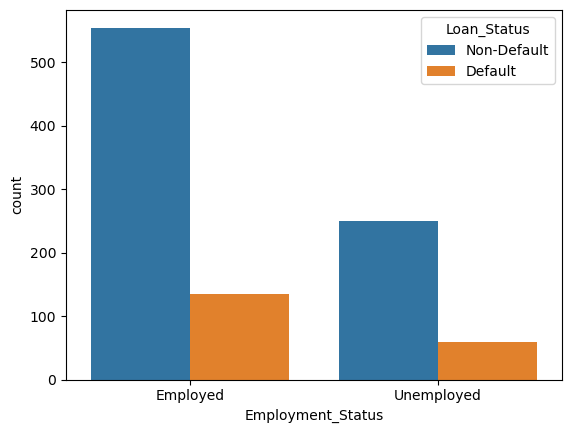

In [13]:
sns.countplot(x="Employment_Status",hue="Loan_Status",data=df)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Loan_Amount', ylabel='Count'>

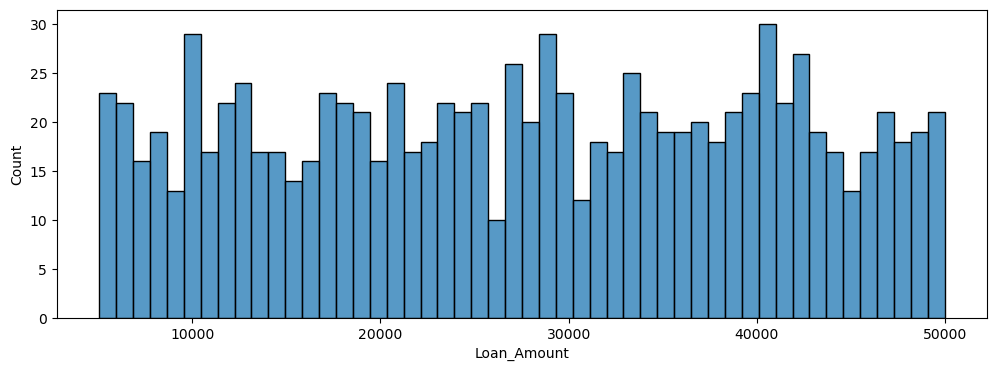

In [129]:
plt.figure(figsize=(12,4))
sns.histplot(df['Loan_Amount'],bins=50)


In [130]:
corr=df.corr()
corr

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
Age,1.000000,0.019046,0.031464,0.005183,0.000498,0.020273,0.017853,-0.009584,-0.026703,0.011274,0.025183,0.058390
Gender,0.019046,1.000000,-0.020625,0.022887,0.029663,-0.002344,0.016719,0.003165,0.018784,-0.046591,0.000493,-0.020686
Income,0.031464,-0.020625,1.000000,0.012012,-0.005126,-0.011904,-0.023798,-0.021298,-0.049860,0.012149,-0.014684,-0.009665
Employment_Status,0.005183,0.022887,0.012012,1.000000,-0.014968,-0.074553,-0.037251,0.010693,0.002456,0.029243,0.003367,0.011310
Location,0.000498,0.029663,-0.005126,-0.014968,1.000000,-0.037568,-0.022458,-0.052827,-0.008736,0.000439,-0.035567,-0.023856
Credit_Score,0.020273,-0.002344,-0.011904,-0.074553,-0.037568,1.000000,-0.014660,0.000330,-0.081920,-0.041100,-0.027405,-0.010250
Debt_to_Income_Ratio,0.017853,0.016719,-0.023798,-0.037251,-0.022458,-0.014660,1.000000,-0.014892,-0.003447,-0.016690,0.025461,0.017012
Existing_Loan_Balance,-0.009584,0.003165,-0.021298,0.010693,-0.052827,0.000330,-0.014892,1.000000,-0.023138,-0.004776,0.009635,0.061003
Loan_Status,-0.026703,0.018784,-0.049860,0.002456,-0.008736,-0.081920,-0.003447,-0.023138,1.000000,0.009477,-0.008652,-0.029639
Loan_Amount,0.011274,-0.046591,0.012149,0.029243,0.000439,-0.041100,-0.016690,-0.004776,0.009477,1.000000,0.095279,0.036979


In [301]:
df1=df.copy()
df1.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266,0,1,639,0.007142,27060,1,13068,18,59
1,46,0,37283,0,1,474,0.456731,40192,0,15159,11,69
2,32,1,69567,0,2,750,0.329231,25444,0,6131,17,69
3,60,0,72016,0,0,435,0.052482,3122,1,37531,16,26
4,25,0,32161,1,1,315,0.450236,19197,1,41466,18,66


In [302]:
# Calculate Debt Burden
df1['debt_burden'] = df1['Existing_Loan_Balance'] / df1['Income']

# Calculate Loan-to-Income Ratio
df1['loan_to_income_ratio'] = df1['Loan_Amount'] / df1['Income']

# Calculate Payment-to-Income Ratio
df1['payment_to_income_ratio'] = (df1['Loan_Amount'] / df1['Loan_Duration_Months']) / df1['Income']

In [303]:
df1.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months,debt_burden,loan_to_income_ratio,payment_to_income_ratio
0,56,1,71266,0,1,639,0.007142,27060,1,13068,18,59,0.379704,0.183369,0.003108
1,46,0,37283,0,1,474,0.456731,40192,0,15159,11,69,1.078025,0.406593,0.005893
2,32,1,69567,0,2,750,0.329231,25444,0,6131,17,69,0.365748,0.088131,0.001277
3,60,0,72016,0,0,435,0.052482,3122,1,37531,16,26,0.043351,0.521148,0.020044
4,25,0,32161,1,1,315,0.450236,19197,1,41466,18,66,0.596903,1.289326,0.019535


# 5.Finding outliers and skewness

In [156]:
# find outliers - box plot & skewed data - hist plot
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


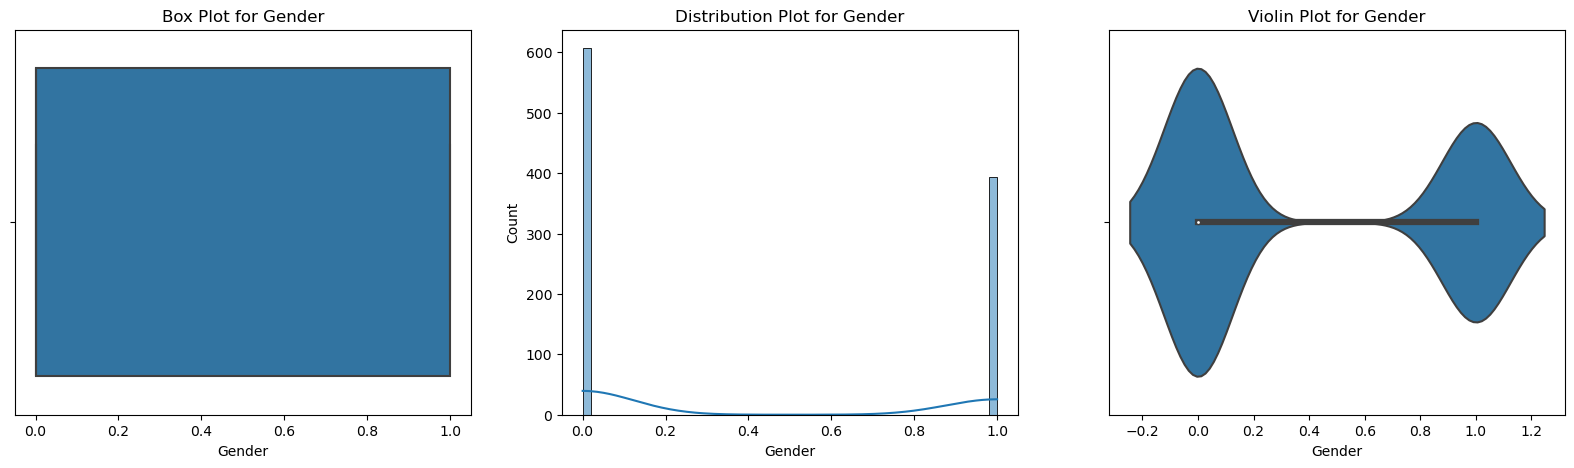

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


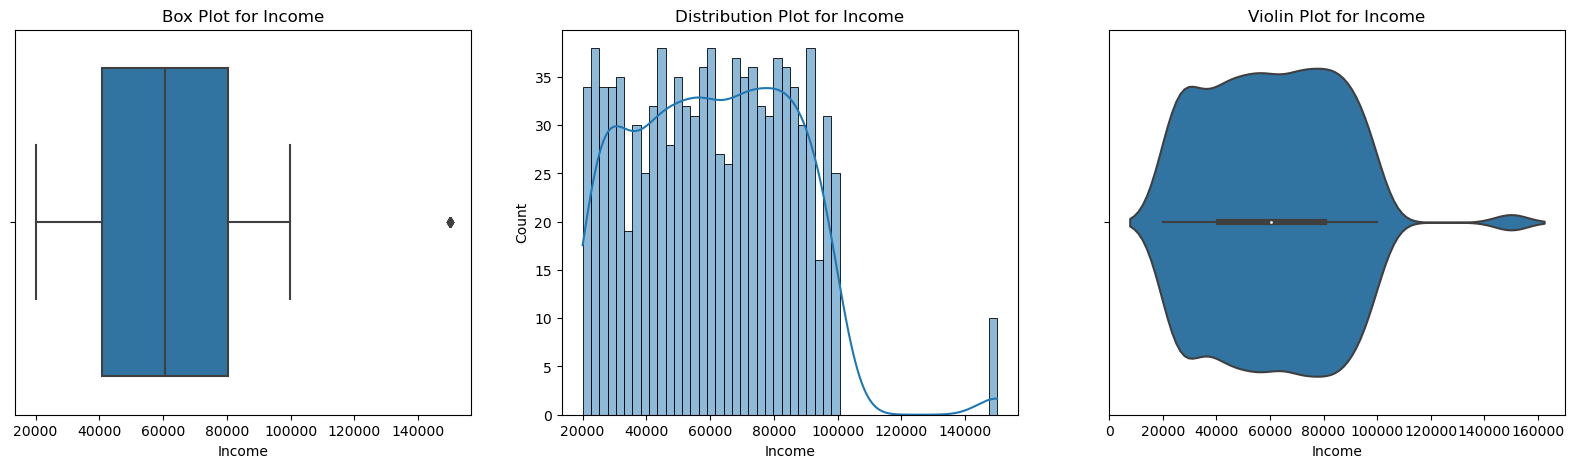

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


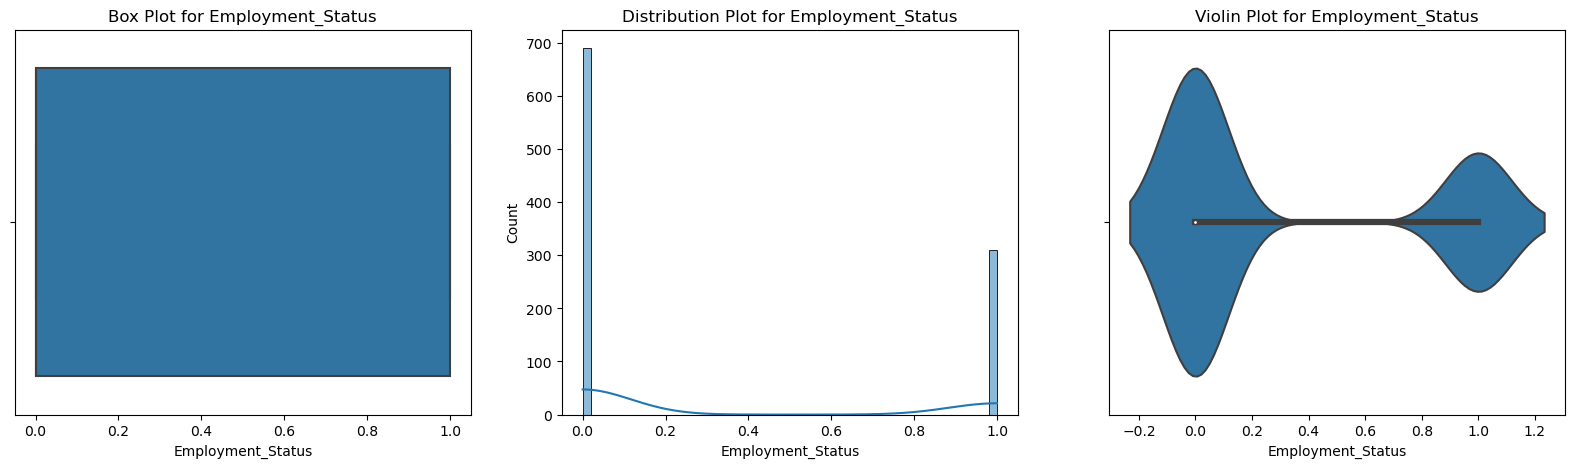

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


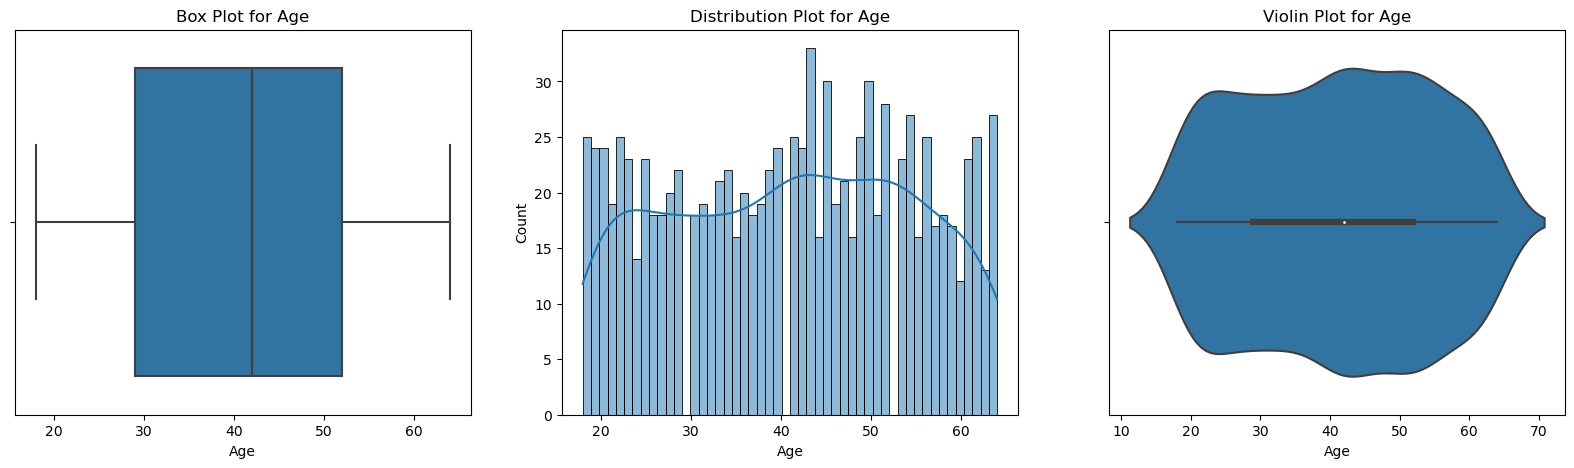

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


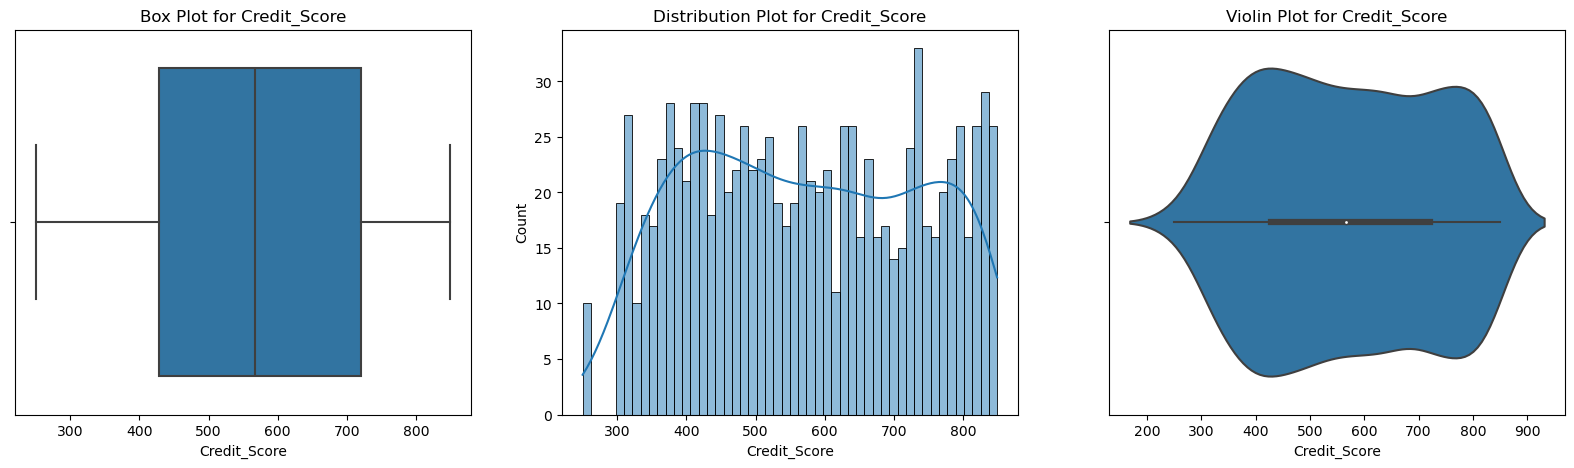

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


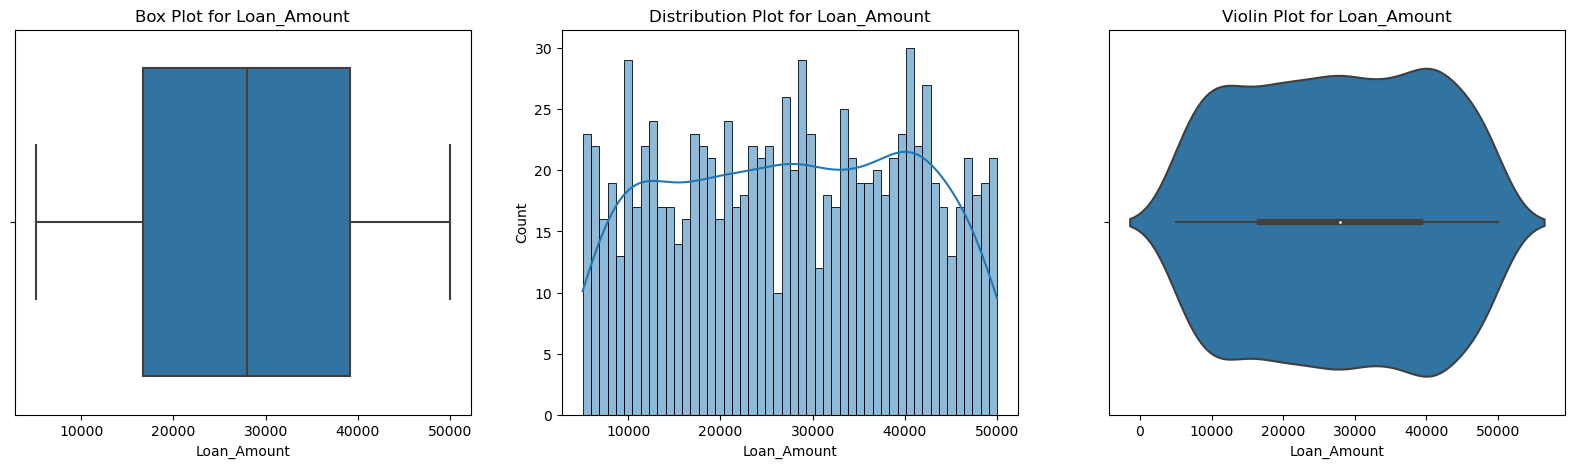

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


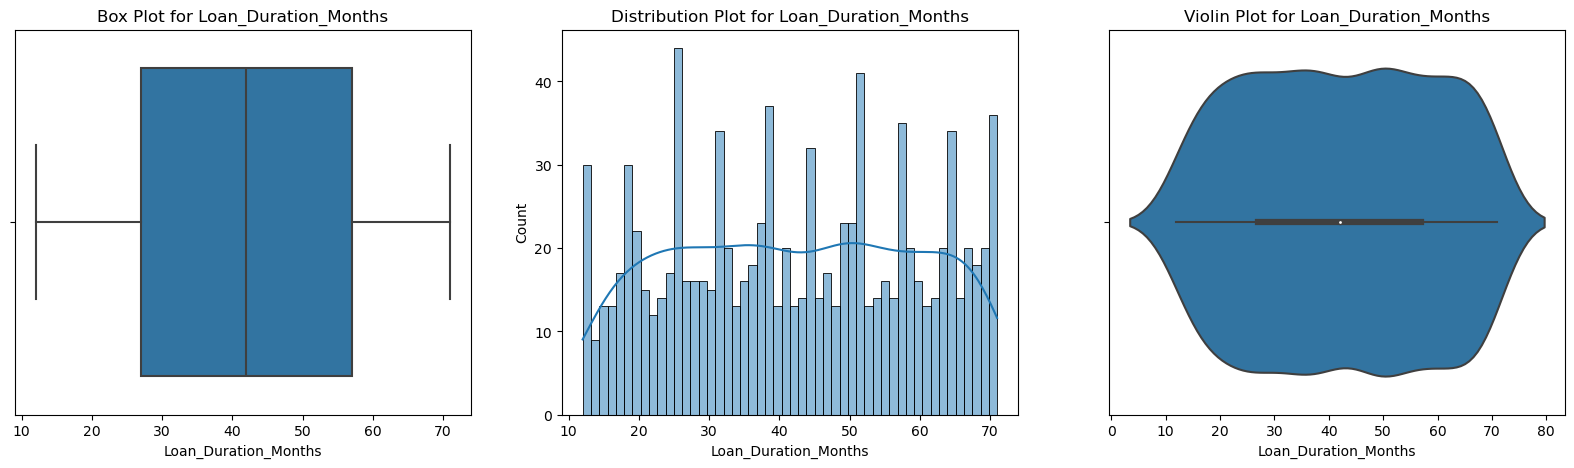

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


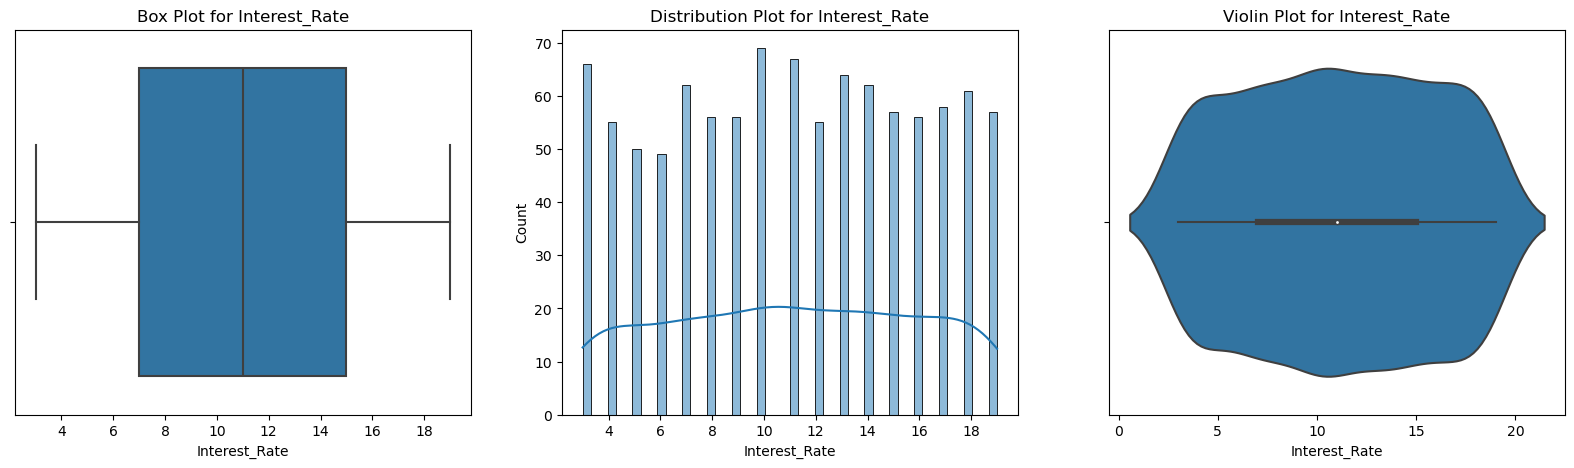

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


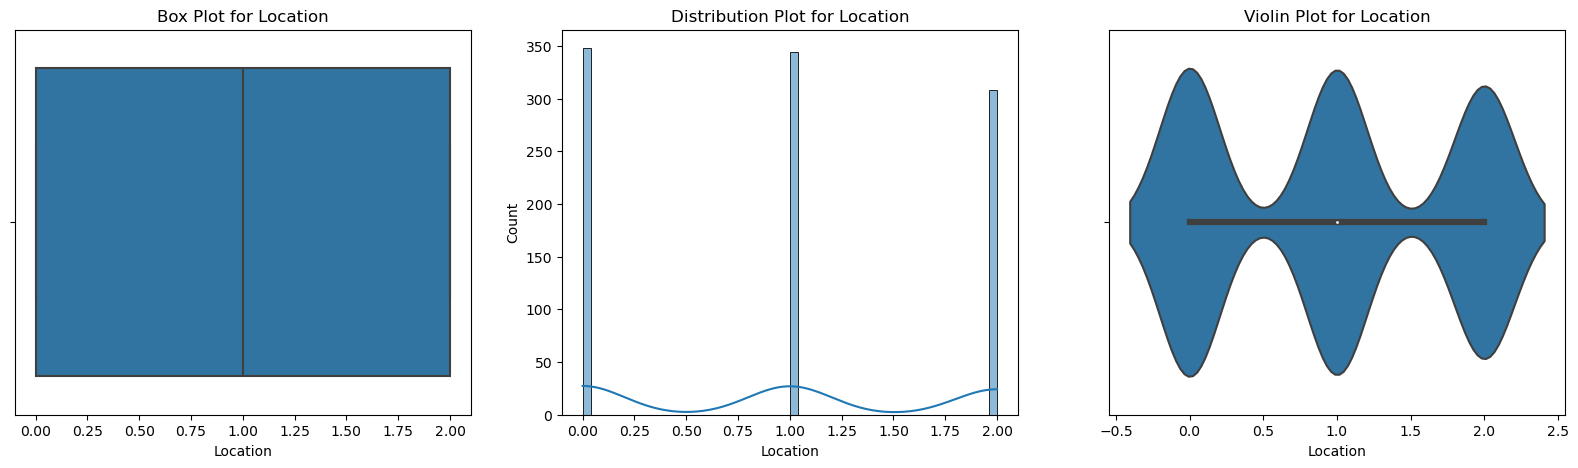

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


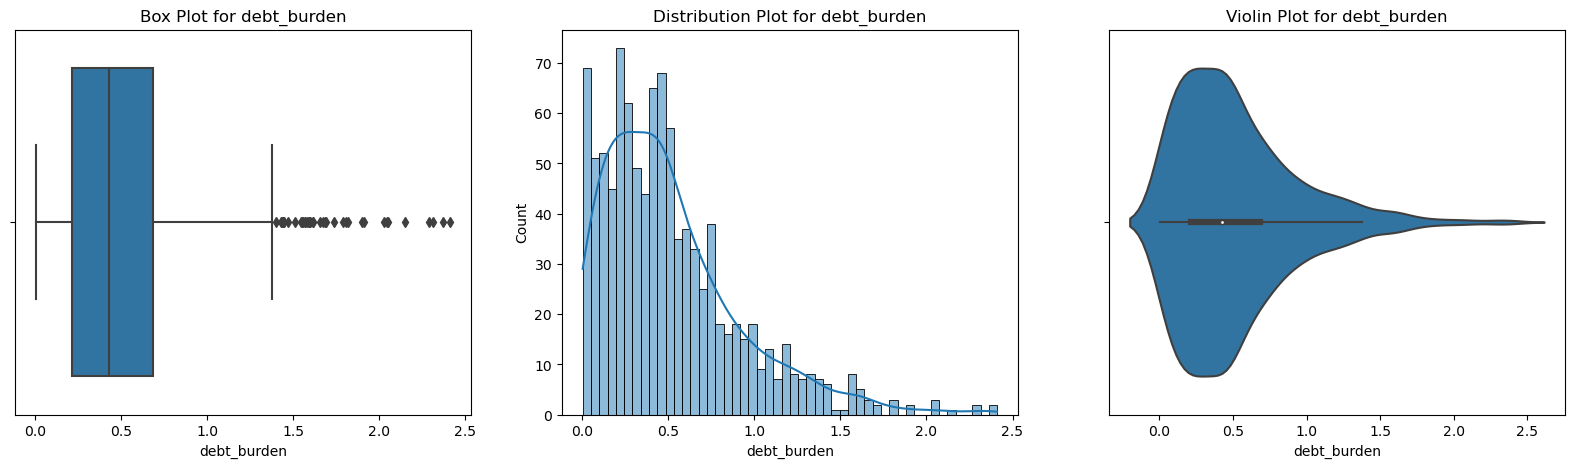

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


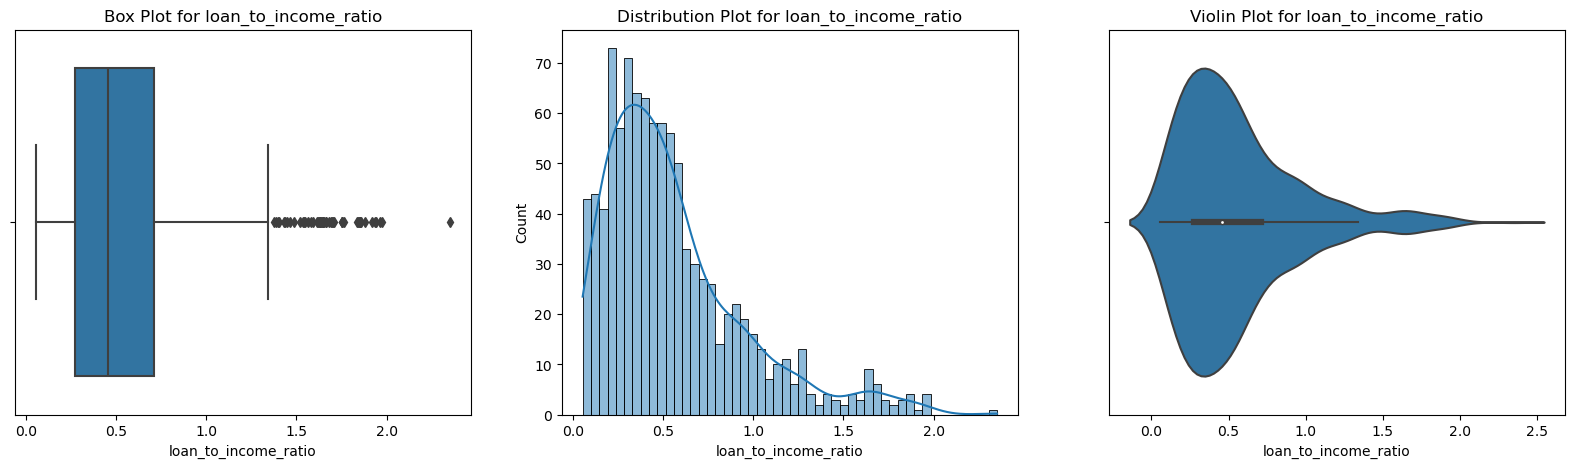

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


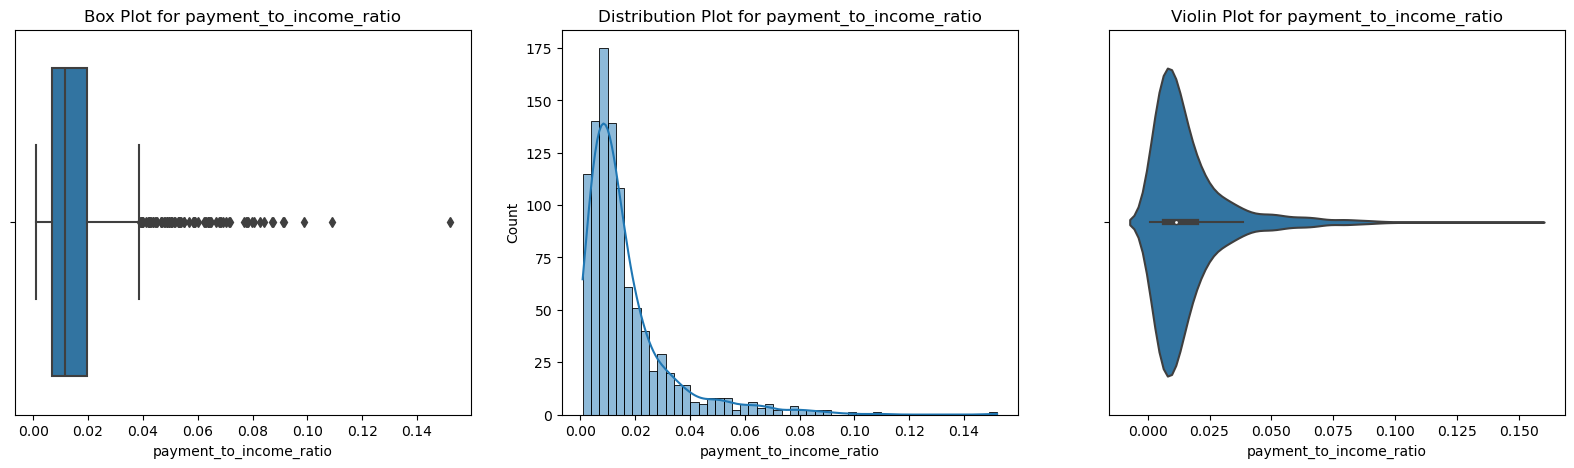

In [159]:
for i in ['Gender','Income','Employment_Status','Age','Credit_Score','Loan_Amount','Loan_Duration_Months','Interest_Rate','Location','debt_burden','loan_to_income_ratio','payment_to_income_ratio']:
    plot(df, i)

In [299]:
df1=df.copy()
df1.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266,0,1,639,0.007142,27060,1,13068,18,59
1,46,0,37283,0,1,474,0.456731,40192,0,15159,11,69
2,32,1,69567,0,2,750,0.329231,25444,0,6131,17,69
3,60,0,72016,0,0,435,0.052482,3122,1,37531,16,26
4,25,0,32161,1,1,315,0.450236,19197,1,41466,18,66


In [304]:
df1['debt_burden']=np.log(df1['debt_burden'])
df1['loan_to_income_ratio'] = np.log(df1['loan_to_income_ratio'])
df1['payment_to_income_ratio'] = np.log(df1['payment_to_income_ratio'])

In [262]:
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months,debt_burden,loan_to_income_ratio,payment_to_income_ratio
0,56,1,71266,0,1,639,0.007142,27060,1,13068,18,59,-0.968363,-1.696253,-5.773790
1,46,0,37283,0,1,474,0.456731,40192,0,15159,11,69,0.075131,-0.899943,-5.134050
2,32,1,69567,0,2,750,0.329231,25444,0,6131,17,69,-1.005810,-2.428932,-6.663039
3,60,0,72016,0,0,435,0.052482,3122,1,37531,16,26,-3.138414,-0.651721,-3.909818
4,25,0,32161,1,1,315,0.450236,19197,1,41466,18,66,-0.516001,0.254119,-3.935535


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


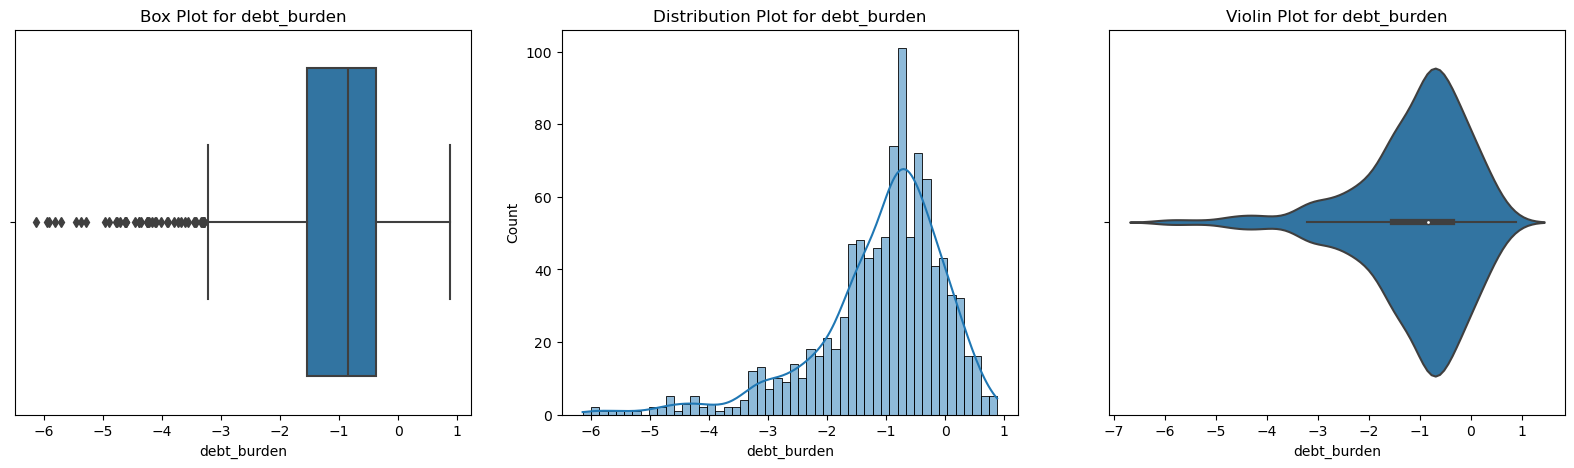

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


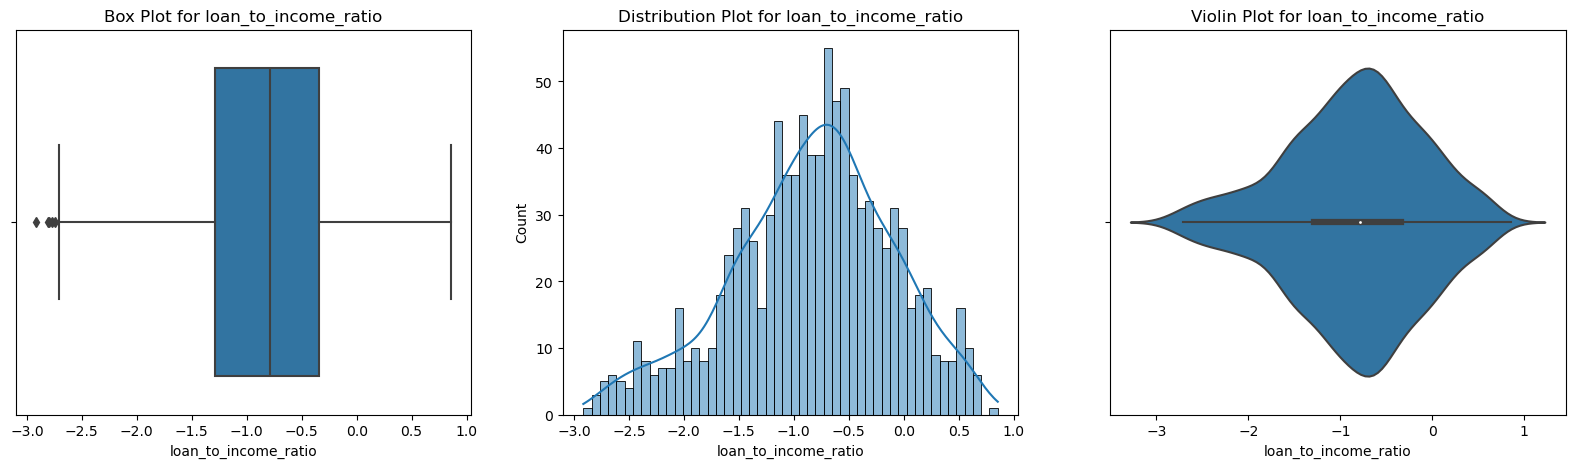

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


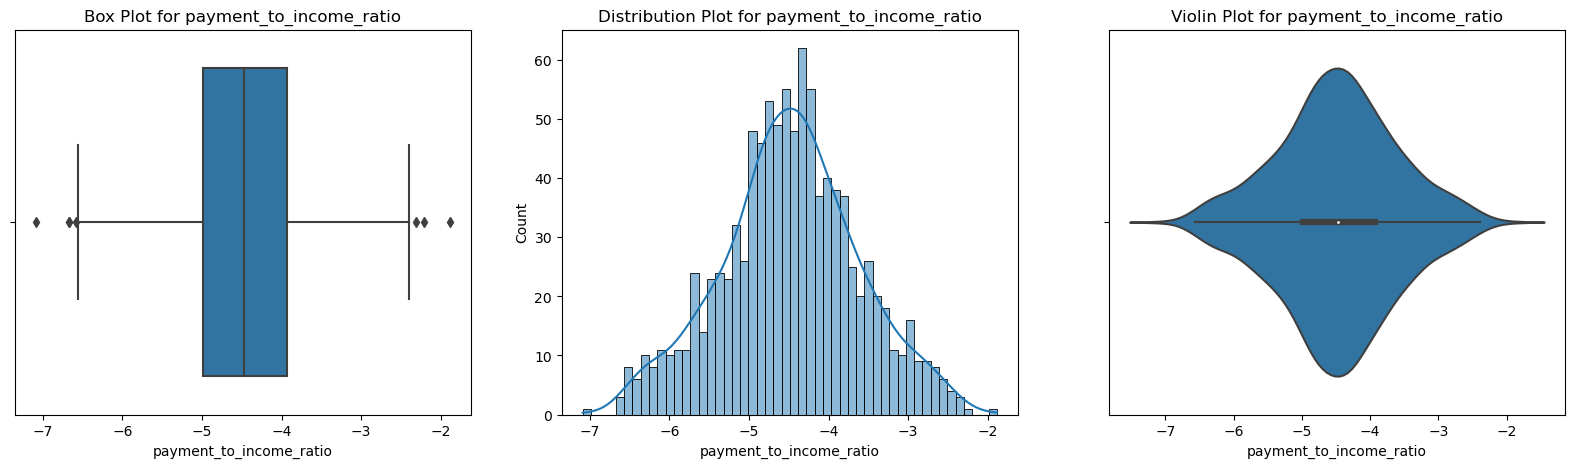

In [305]:
for i in ['debt_burden','loan_to_income_ratio','payment_to_income_ratio']:
    plot(df1, i)

In [306]:
df1.to_csv('loanfinal.csv', index=False)

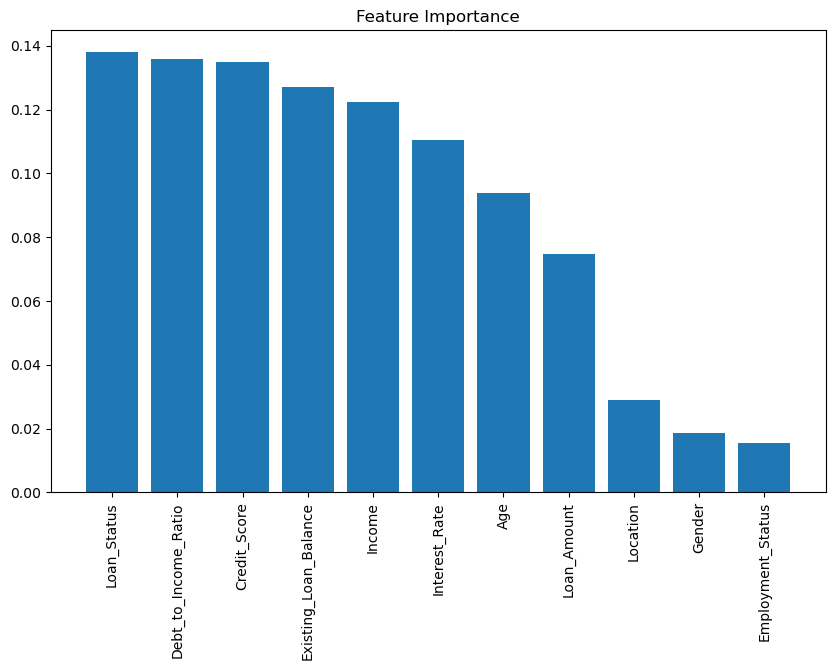

In [286]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset (or replace it with your dataset)
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']


feature_names = ['Age','Gender','Income','Employment_Status','Location','Credit_Score','Debt_to_Income_Ratio','Existing_Loan_Balance','Loan_Status','Loan_Amount','Interest_Rate','Loan_Duration_Months']#'dept_burden','loan_to_income_ratio','payment_to_income_ratio']

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), names, rotation=90)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier

In [307]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Preprocess the data with StandardScaler
scaler = StandardScaler()
# Grid search cross-validation
x = df1.drop(columns=['Loan_Status'], axis=1)
y = df1['Loan_Status']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Example values for C
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4]
}

# Create SVC classifier
svc = SVC(kernel='linear')

grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)  # Assuming X_train and y_train are your training data

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'tol': 0.001}


In [308]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Preprocess the data with StandardScaler
scaler = StandardScaler()
# Grid search cross-validation
x = df1.drop(columns=['Loan_Status'], axis=1)
y = df1['Loan_Status']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Use the best parameters obtained from GridSearchCV
best= {'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'tol': 0.001}
# Create SVC classifier
svc = SVC(kernel='linear',**best)

# Train the final model on the entire training dataset
svc.fit(X_train_scaled, y_train)

x_pred = svc.predict(X_train_scaled)

accuracy_train = metrics.accuracy_score(x_pred,y_train)
precision_train=metrics.precision_score(x_pred,y_train)
recall_train=metrics.recall_score(x_pred,y_train)
print(accuracy_train)
print(precision_train)
print(recall_train)

# Predict on the test dataset
y_pred = svc.predict(X_test_scaled)


# Evaluate the model performance
accuracy_test = metrics.accuracy_score(y_test, y_pred)
precision=metrics.precision_score(y_test, y_pred)
recall=metrics.recall_score(y_test, y_pred)
print(accuracy_test)
print(precision)
print(recall)


0.81
1.0
0.81
0.785
0.785
1.0


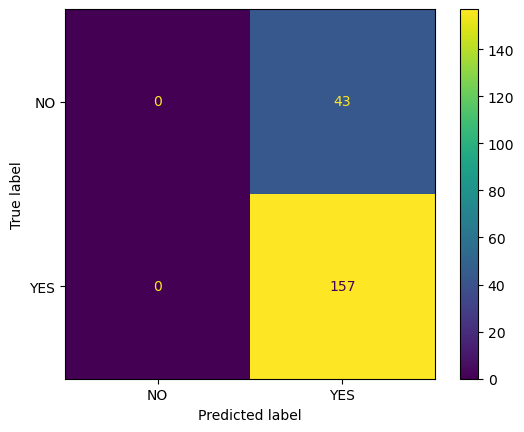

In [257]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["NO", "YES"])

cm_display.plot()
plt.show()

In [395]:
# Preprocess the data with StandardScaler
scaler = StandardScaler()
# Grid search cross-validation
x = df1.drop(columns=['Loan_Status'], axis=1)
y = df1['Loan_Status']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Use the best parameters obtained from GridSearchCV
best= {'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'tol': 0.001}
# Create SVC classifier
svc = SVC(kernel='linear',**best)
svc.fit(X_train_scaled, y_train)

user_data = np.array([[66,1,71266,0,1,639,0.007,27060,13068,18,59,.09,-1.6,-5.77]])
feature_names = [['Age','Gender','Income','Employment_Status','Location','Credit_Score','Debt_to_Income_Ratio','Existing_Loan_Balance','Loan_Status','Loan_Amount','Interest_Rate','Loan_Duration_Months','dept_burden','loan_to_income_ratio','payment_to_income_ratio']]
y_p = svc.predict(user_data)
if y_p[0] == 1:
    print('Non-Default')
else:
    print('Default')

Non-Default


In [380]:
# Preprocess the data with StandardScaler
scaler = StandardScaler()
# Grid search cross-validation
x = df1.drop(columns=['Loan_Status'], axis=1)
y = df1['Loan_Status']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Use the best parameters obtained from GridSearchCV
best= {'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'tol': 0.001}
# Create SVC classifier
svc = SVC(kernel='linear',**best)
svc.fit(X_train_scaled, y_train)

user_data = np.array([[57,0,39266,0,0,525,0.07,35197,9068,12,16,.09,1.6,5.77]])
feature_names = [['Age','Gender','Income','Employment_Status','Location','Credit_Score','Debt_to_Income_Ratio','Existing_Loan_Balance','Loan_Status','Loan_Amount','Interest_Rate','Loan_Duration_Months','dept_burden','loan_to_income_ratio','payment_to_income_ratio']]
y_p = svc.predict(user_data)
if y_p[0] == 1:
    print('Non-Default')
else:
    print('Default')

Non-Default


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


x =df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Assuming X_train, y_train are your training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

best_params={'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Initialize your classifier
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_resampled, y_resampled)

test_predictions = best_rf_classifier.predict(X_test)
test_proba_predictions = best_rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC



accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_proba_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.7
Precision: 0.7869822485207101
Recall: 0.8471337579617835
F1 Score: 0.8159509202453987
ROC AUC: 0.5328840171826397


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (AUC-ROC):", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (AUC-ROC): 0.8984925003440208


In [13]:
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_resampled, y_resampled)

x =df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

# Evaluate the model on test data
test_predictions = best_rf_classifier.predict(X_test)
test_proba_predictions = best_rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_proba_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.71
Precision: 0.8160919540229885
Recall: 0.8452380952380952
F1 Score: 0.8304093567251462
ROC AUC: 0.48511904761904756


In [403]:
x =df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2',0.5,0.7]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [404]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [405]:
grid_search.best_score_

0.7725000000000001

In [400]:
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266,0,1,639,0.007142,27060,1,13068,18,59
1,46,0,37283,0,1,474,0.456731,40192,0,15159,11,69
2,32,1,69567,0,2,750,0.329231,25444,0,6131,17,69
3,60,0,72016,0,0,435,0.052482,3122,1,37531,16,26
4,25,0,32161,1,1,315,0.450236,19197,1,41466,18,66


In [412]:
# passing the parameters in the decision tree algorithm and check the accuracy for training and testing
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='entropy',max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
x_train_prediction=model.predict(x_train)
accuracy_train = metrics.accuracy_score(x_train_prediction,y_train)
precision=metrics.precision_score(x_train_prediction,y_train)
recall=metrics.recall_score(x_train_prediction,y_train)
print(accuracy_train)
print(precision)
print(recall)
with open('dectree1_model.pkl', 'wb') as f:
    pickle.dump(model, f)

0.8975
0.9984567901234568
0.8887362637362637


In [409]:
# passing the parameters in the decision tree algorithm and check the accuracy for training and testing
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='entropy',max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
x_test_prediction=model.predict(x_test)
accuracy_test = metrics.accuracy_score(x_test_prediction,y_test)
precision=metrics.precision_score(x_test_prediction,y_test)
recall=metrics.recall_score(x_test_prediction,y_test)
print(accuracy_test)
print(precision)
print(recall)

0.75
0.9171974522292994
0.7955801104972375


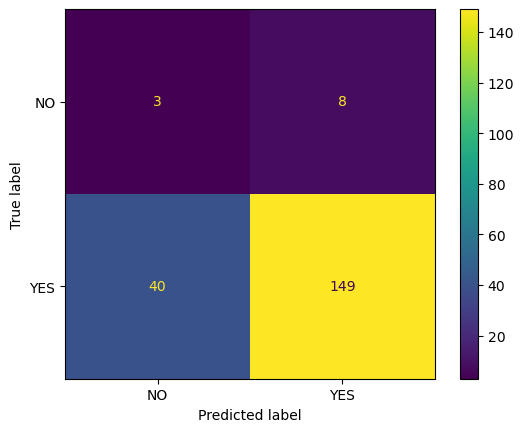

In [253]:
confusion_matrix = metrics.confusion_matrix(x_test_prediction,y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["NO", "YES"])

cm_display.plot()
plt.show()

In [435]:
x = df1.drop(columns=['Loan_Status'], axis=1)
y = df1['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(criterion='entropy',max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5).fit(x_train, y_train)
user_data = np.array([[67,1,71266,0,1,305,0.007,27197,13068,18,59,-0.08,-1.44,-4.22]])
feature_names = [['Age','Gender','Income','Employment_Status','Location','Credit_Score','Debt_to_Income_Ratio','Existing_Loan_Balance','Loan_Amount','Interest_Rate','Loan_Duration_Months','dept_burden','loan_to_income_ratio','payment_to_income_ratio']]
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Non-Default')
else:
    print('Default')

Default


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [413]:
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(criterion='entropy',max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5).fit(X_train, y_train)
user_data = np.array([[57,0,39266,0,0,525,0.07,35197,9068,12,16]])
feature_names = [['Age','Gender','Income','Employment_Status','Location','Credit_Score','Debt_to_Income_Ratio','Existing_Loan_Balance','Loan_Amount','Interest_Rate','Loan_Duration_Months']]#'dept_burden','loan_to_income_ratio','payment_to_income_ratio']]
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Non-Default')
else:
    print('Default')	

Default


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [382]:
import pickle
with open('dectree_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [432]:
import pickle
with open('dectree1_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[55,1,39266,1,0,425,0.07,35197,9068,12,16]]))
y_pred[0]
if y_pred[0] == 1:
    print('Non-Default')
else:
    print('Default')	

Non-Default


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [442]:
grid_search.best_params_
#grid_search.best_score_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [438]:
from sklearn.ensemble import RandomForestClassifier
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


param_grid = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}


grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5,  n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [443]:
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
x_train_prediction=model.predict(x_train)
accuracy_train = metrics.accuracy_score(x_train_prediction,y_train)
precision=metrics.precision_score(x_train_prediction,y_train)
recall=metrics.recall_score(x_train_prediction,y_train)
print(accuracy_train)
print(precision)
print(recall)

1.0
1.0
1.0


In [445]:
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)

x_test_prediction=model.predict(x_test)
accuracy_test = metrics.accuracy_score(x_test_prediction,y_test)
precision=metrics.precision_score(x_test_prediction,y_test)
recall=metrics.recall_score(x_test_prediction,y_test)
print(accuracy_test)
print(precision)
print(recall)



with open('ranforest_model.pkl', 'wb') as f:
    pickle.dump(model, f)


0.79
1.0
0.7889447236180904


In [18]:
import pickle
with open('ranforest_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[25,1,25266,0,0,755,0.07,35197,45068,12,46]]))
y_pred[0]
if y_pred[0] == 1:
    print('Non-Default')
else:
    print('Default')	

Non-Default


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
